In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../info_data/batch_metrics.csv")

In [2]:
metrics_df = pd.read_csv(DATA)
print(metrics_df.head())

                               path apod  zf status error           lwn  \
0  Data/CM_Fiber_3_Reps0114082719.0   b3   2     OK   NaN  15798.469552   
1  Data/CM_Fiber_3_Reps0114082844.0   b3   2     OK   NaN  15798.469552   
2  Data/CM_Fiber_3_Reps0114083010.0   b3   2     OK   NaN  15798.469552   
3  Data/CM_Fiber_3_Reps0114083135.0   b3   2     OK   NaN  15798.469552   
4  Data/CM_Fiber_3_Reps0114083301.0   b3   2     OK   NaN  15798.469552   

      hfq      lfq  points  mean_dnu_cm-1    peak_cm-1    peak_A  rms_vs_opus  \
0  4000.0  12000.0  2074.0       3.857048  5176.158725  4.788320     0.005828   
1  4000.0  12000.0  2074.0       3.857048  5160.730532  4.560266     0.005770   
2  4000.0  12000.0  2074.0       3.857048  5164.587581  4.520462     0.005192   
3  4000.0  12000.0  2074.0       3.857048  5156.873484  4.642527     0.006243   
4  4000.0  12000.0  2074.0       3.857048  5156.873484  4.651909     0.006066   

   mae_vs_opus  maxabs_vs_opus  
0     0.001019        0.10098

In [3]:
# Keep only OK rows
df_ok = metrics_df[metrics_df["status"] == "OK"].copy()

# Convert numeric columns safely
num_cols = [
    "lwn", "hfq", "lfq", "points", "mean_dnu_cm-1",
    "peak_cm-1", "peak_A", "rms_vs_opus", "mae_vs_opus", "maxabs_vs_opus"
]
for c in num_cols:
    df_ok[c] = pd.to_numeric(df_ok[c], errors="coerce")

print("Total rows:", len(metrics_df))
print("OK rows:", len(df_ok))
df_ok[num_cols].isna().sum()

Total rows: 26508
OK rows: 25725


lwn               0
hfq               0
lfq               0
points            0
mean_dnu_cm-1     0
peak_cm-1         0
peak_A            0
rms_vs_opus       0
mae_vs_opus       0
maxabs_vs_opus    0
dtype: int64

In [4]:
df_ok[["rms_vs_opus", "mae_vs_opus", "maxabs_vs_opus", "peak_A"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rms_vs_opus,25725.0,0.006383,0.001637,0.000130,0.005787,0.006418,0.006857,0.025034
mae_vs_opus,25725.0,0.001233,0.000312,0.000023,0.001145,0.001234,0.001308,0.005053
maxabs_vs_opus,25725.0,0.069254,0.023885,0.001453,0.058639,0.065026,0.071711,0.674640
peak_A,25725.0,4.628821,0.214909,0.017222,4.595773,4.660216,4.706081,6.733508


In [5]:
def percentiles(series, ps=(50, 75, 90, 95, 99, 99.9)):
    x = series.dropna().to_numpy()
    return {p: float(np.percentile(x, p)) for p in ps}

print("RMS percentiles:", percentiles(df_ok["rms_vs_opus"]))
print("MAE percentiles:", percentiles(df_ok["mae_vs_opus"]))
print("MAXABS percentiles:", percentiles(df_ok["maxabs_vs_opus"]))

RMS percentiles: {50: 0.0064179158668707, 75: 0.0068570537687823, 90: 0.00734039920948504, 95: 0.008094074903138999, 99: 0.013446649187536004, 99.9: 0.01887214857938811}
MAE percentiles: {50: 0.0012335677920946, 75: 0.0013080061424694, 90: 0.0014012394311448202, 95: 0.0015675561977565597, 99: 0.0025813110325057726, 99.9: 0.0036515380050628835}
MAXABS percentiles: {50: 0.0650262513576596, 75: 0.0717109338361714, 90: 0.08218665326211255, 95: 0.1084547168047366, 99: 0.17273557962685654, 99.9: 0.2942394482655923}


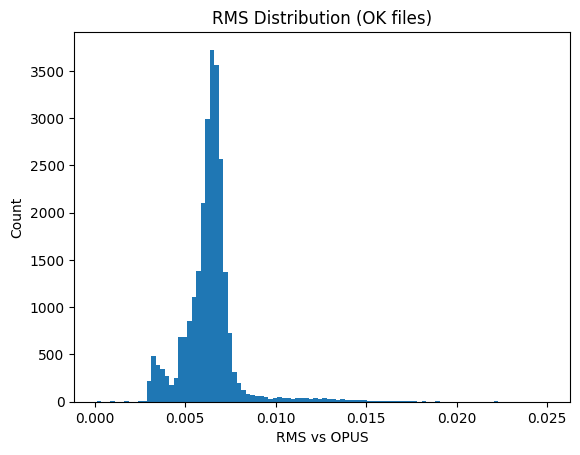

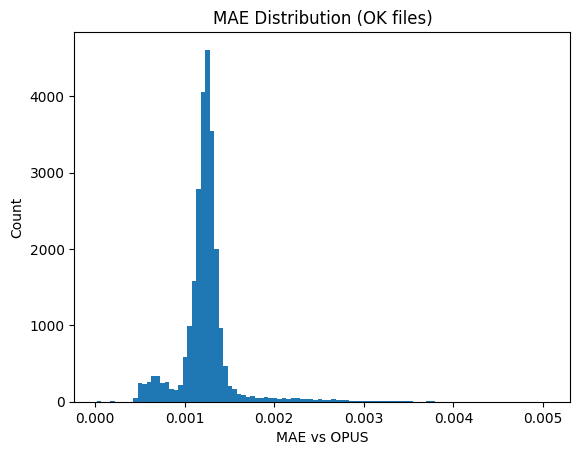

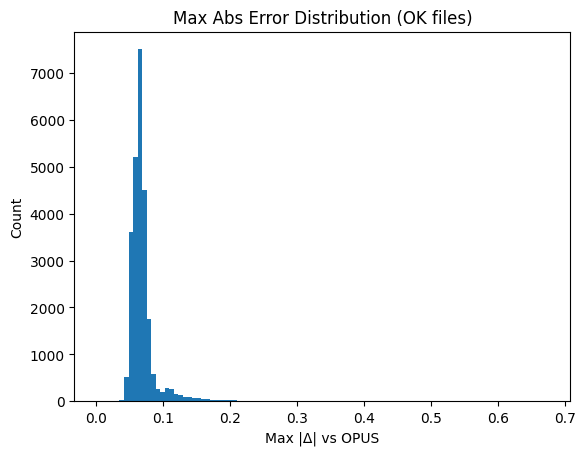

In [6]:
plt.figure()
plt.hist(df_ok["rms_vs_opus"].dropna(), bins=100)
plt.xlabel("RMS vs OPUS")
plt.ylabel("Count")
plt.title("RMS Distribution (OK files)")
plt.show()

plt.figure()
plt.hist(df_ok["mae_vs_opus"].dropna(), bins=100)
plt.xlabel("MAE vs OPUS")
plt.ylabel("Count")
plt.title("MAE Distribution (OK files)")
plt.show()

plt.figure()
plt.hist(df_ok["maxabs_vs_opus"].dropna(), bins=100)
plt.xlabel("Max |Δ| vs OPUS")
plt.ylabel("Count")
plt.title("Max Abs Error Distribution (OK files)")
plt.show()

In [7]:
df_ok.sort_values("rms_vs_opus", ascending=False)[
    ["path", "rms_vs_opus", "mae_vs_opus", "maxabs_vs_opus", "peak_cm-1", "peak_A"]
].head(25)

,path,rms_vs_opus,mae_vs_opus,maxabs_vs_opus,peak_cm-1,peak_A
3289,Data/Cheese Milk062820200820.0,0.025034,0.004100,0.372669,5207.015111,5.357409
4004,Data/Cheese Milk071620192136.0,0.024555,0.003773,0.605023,5183.872822,6.605023
3384,Data/Cheese Milk071320201057.0,0.024466,0.004160,0.385629,5172.301677,5.623931
15199,Data/GAR_Cheese Milk_10_18_2022_1652.0,0.024403,0.004158,0.674640,5199.301015,6.733508
16015,Data/GAR_Cheese Milk_10_24_2022_1710.0,0.023856,0.004776,0.437405,5145.302339,6.565807
3051,Data/Cheese Milk042620200800.0,0.023079,0.003721,0.328333,5176.158725,5.507973
862,Data/CM_Fiber_3_Reps0305133005.0,0.022984,0.003177,0.287208,5176.158725,5.300671
2986,Data/Cheese Milk041220201115.0,0.022203,0.003507,0.393937,5241.728545,5.362244
3397,Data/Cheese Milk071420201120.0,0.022186,0.003979,0.268854,5222.443304,5.171487
819,Data/CM_Fiber_3_Reps0305105318.0,0.022083,0.002958,0.319977,5222.443304,5.227121


In [8]:
print("Unique lwn values (counts):")
print(df_ok["lwn"].value_counts().head(10))

print("\nUnique (hfq, lfq) pairs (top 10):")
print(df_ok.groupby(["hfq", "lfq"]).size().sort_values(ascending=False).head(10))

print("\nPoints (top 10):")
print(df_ok["points"].value_counts().head(10))

print("\nmean_dnu (top 10):")
print(df_ok["mean_dnu_cm-1"].value_counts().head(10))

Unique lwn values (counts):
lwn
15798.469552    24255
15798.270022      808
15798.693521      289
15798.479733      195
15798.374877      178
Name: count, dtype: int64

Unique (hfq, lfq) pairs (top 10):
hfq     lfq    
4000.0  12000.0    25241
        12500.0      484
dtype: int64

Points (top 10):
points
2074.0    25241
2203.0      484
Name: count, dtype: int64

mean_dnu (top 10):
mean_dnu_cm-1
3.857048    24255
3.857000      808
3.857103      289
3.857051      195
3.857025      178
Name: count, dtype: int64


In [9]:
cols = ["rms_vs_opus", "mae_vs_opus", "maxabs_vs_opus", "peak_A", "peak_cm-1"]
df_ok[cols].corr()

,rms_vs_opus,mae_vs_opus,maxabs_vs_opus,peak_A,peak_cm-1
rms_vs_opus,1.000000,0.941737,0.826979,0.551118,0.042507
mae_vs_opus,0.941737,1.000000,0.705905,0.545666,0.060625
maxabs_vs_opus,0.826979,0.705905,1.000000,0.469953,-0.070272
peak_A,0.551118,0.545666,0.469953,1.000000,0.077295
peak_cm-1,0.042507,0.060625,-0.070272,0.077295,1.000000
